# Read and explore data

## Load Libraries

In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns

In [85]:
# Scikit-Learn Model libraries (question II)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Applications Data

In [3]:
applications_data = pd.read_csv('../data/BPI_Challenge_2017.csv')

In [4]:
applications_data.columns.values

array(['Action', 'org:resource', 'concept:name', 'EventOrigin', 'EventID',
       'lifecycle:transition', 'time:timestamp', 'case:LoanGoal',
       'case:ApplicationType', 'case:concept:name',
       'case:RequestedAmount', 'FirstWithdrawalAmount', 'NumberOfTerms',
       'Accepted', 'MonthlyCost', 'Selected', 'CreditScore',
       'OfferedAmount', 'OfferID'], dtype=object)

#### Fix column names 

In [5]:
fix_cols_names = lambda x: re.sub( '(?<!^)(?=[A-Z])', '_', x.replace('ID','Id')).lower().replace(':','_').replace('__','_')
fixed_app_cols = [fix_cols_names(col) for col in applications_data.columns]
fixed_app_cols

['action',
 'org_resource',
 'concept_name',
 'event_origin',
 'event_id',
 'lifecycle_transition',
 'time_timestamp',
 'case_loan_goal',
 'case_application_type',
 'case_concept_name',
 'case_requested_amount',
 'first_withdrawal_amount',
 'number_of_terms',
 'accepted',
 'monthly_cost',
 'selected',
 'credit_score',
 'offered_amount',
 'offer_id']

In [6]:
applications_data.columns = fixed_app_cols

In [7]:
applications_data.head()

,action,org_resource,concept_name,event_origin,event_id,lifecycle_transition,time_timestamp,case_loan_goal,case_application_type,case_concept_name,case_requested_amount,first_withdrawal_amount,number_of_terms,accepted,monthly_cost,selected,credit_score,offered_amount,offer_id
0,Created,User_1,A_Create Application,Application,Application_652823628,complete,2016-01-01 09:51:15.304000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,statechange,User_1,A_Submitted,Application,ApplState_1582051990,complete,2016-01-01 09:51:15.352000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Created,User_1,W_Handle leads,Workflow,Workitem_1298499574,schedule,2016-01-01 09:51:15.774000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Deleted,User_1,W_Handle leads,Workflow,Workitem_1673366067,withdraw,2016-01-01 09:52:36.392000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Created,User_1,W_Complete application,Workflow,Workitem_1493664571,schedule,2016-01-01 09:52:36.403000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
applications_data.describe()

,case_requested_amount,first_withdrawal_amount,number_of_terms,monthly_cost,credit_score,offered_amount
count,1.202267e+06,42995.000000,42995.000000,42995.000000,42995.000000,42995.000000
mean,1.675947e+04,8394.338979,83.041982,281.403309,318.645912,18513.719940
std,1.572320e+04,10852.443358,36.386199,192.577735,433.706216,13718.507416
min,0.000000e+00,0.000000,5.000000,43.050000,0.000000,5000.000000
25%,6.000000e+03,0.000000,56.000000,152.820000,0.000000,8800.000000
50%,1.400000e+04,5000.000000,77.000000,244.520000,0.000000,15000.000000
75%,2.300000e+04,12000.000000,120.000000,350.000000,848.000000,25000.000000
max,4.500000e+05,75000.000000,180.000000,6673.830000,1145.000000,75000.000000


In [9]:
applications_data.describe(include='object')

,action,org_resource,concept_name,event_origin,event_id,lifecycle_transition,time_timestamp,case_loan_goal,case_application_type,case_concept_name,accepted,selected,offer_id
count,1202267,1202267,1202267,1202267,1202267,1202267,1202267,1202267,1202267,1202267,42995,42995,150854
unique,5,149,26,3,1202267,7,1202209,14,2,31509,2,2,42995
top,statechange,User_1,W_Validate application,Workflow,Workitem_1212262843,complete,2016-12-06 09:42:34.187000+00:00,Car,New credit,Application_2037628374,True,True,Offer_235241943
freq,358940,148404,209496,768823,1,475306,2,339798,1083767,180,30136,21768,4


In [10]:
applications_data.concept_name.value_counts()

W_Validate application        209496
W_Call after offers           191092
W_Call incomplete files       168529
W_Complete application        148900
W_Handle leads                 47264
O_Create Offer                 42995
O_Created                      42995
O_Sent (mail and online)       39707
A_Validating                   38816
A_Accepted                     31509
A_Concept                      31509
A_Create Application           31509
A_Complete                     31362
O_Returned                     23305
A_Incomplete                   23055
O_Cancelled                    20898
A_Submitted                    20423
O_Accepted                     17228
A_Pending                      17228
A_Cancelled                    10431
O_Refused                       4695
A_Denied                        3753
W_Assess potential fraud        3282
O_Sent (online only)            2026
W_Shortened completion           238
W_Personal Loan collection        22
Name: concept_name, dtype: int64

Final States of an application:
- Application
    - Pending
    - Denied
    - Cancelled
- Order
    - Refused

In [11]:
applications_data.case_concept_name.sample(3)

1061359    Application_856904799
566611     Application_294028593
286020     Application_253625285
Name: case_concept_name, dtype: object

In [12]:
applications_data[applications_data['case_concept_name'] == 'Application_474433009']

,action,org_resource,concept_name,event_origin,event_id,lifecycle_transition,time_timestamp,case_loan_goal,case_application_type,case_concept_name,case_requested_amount,first_withdrawal_amount,number_of_terms,accepted,monthly_cost,selected,credit_score,offered_amount,offer_id
162489,Created,User_1,A_Create Application,Application,Application_474433009,complete,2016-02-24 18:32:36.575000+00:00,Remaining debt home,New credit,Application_474433009,22000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162490,statechange,User_1,A_Submitted,Application,ApplState_1446145212,complete,2016-02-24 18:32:36.628000+00:00,Remaining debt home,New credit,Application_474433009,22000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162491,Created,User_1,W_Handle leads,Workflow,Workitem_1906645971,schedule,2016-02-24 18:32:36.872000+00:00,Remaining debt home,New credit,Application_474433009,22000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162492,Obtained,User_31,W_Handle leads,Workflow,Workitem_796598720,start,2016-02-24 18:33:23.431000+00:00,Remaining debt home,New credit,Application_474433009,22000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162493,Obtained,User_31,W_Handle leads,Workflow,Workitem_1440408610,start,2016-02-24 18:33:48.442000+00:00,Remaining debt home,New credit,Application_474433009,22000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162546,Obtained,User_87,W_Validate application,Workflow,Workitem_937233377,resume,2016-03-09 06:33:16.001000+00:00,Remaining debt home,New credit,Application_474433009,22000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162547,Released,User_87,W_Validate application,Workflow,Workitem_986335648,suspend,2016-03-09 06:33:21.376000+00:00,Remaining debt home,New credit,Application_474433009,22000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162548,statechange,User_75,O_Accepted,Offer,OfferState_2119262436,complete,2016-03-09 06:47:47.342000+00:00,Remaining debt home,New credit,Application_474433009,22000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_1888679278
162549,statechange,User_75,A_Pending,Application,ApplState_889862290,complete,2016-03-09 06:47:47.347000+00:00,Remaining debt home,New credit,Application_474433009,22000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
applications_data[applications_data['case_concept_name'] == 'Application_220112']

,action,org_resource,concept_name,event_origin,event_id,lifecycle_transition,time_timestamp,case_loan_goal,case_application_type,case_concept_name,case_requested_amount,first_withdrawal_amount,number_of_terms,accepted,monthly_cost,selected,credit_score,offered_amount,offer_id
1174564,Created,User_1,A_Create Application,Application,Application_220112,complete,2016-12-21 13:42:49.105000+00:00,Existing loan takeover,New credit,Application_220112,25800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1174565,statechange,User_1,A_Submitted,Application,ApplState_1382600874,complete,2016-12-21 13:42:50.323000+00:00,Existing loan takeover,New credit,Application_220112,25800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1174566,Created,User_1,W_Handle leads,Workflow,Workitem_1904678468,schedule,2016-12-21 13:42:50.515000+00:00,Existing loan takeover,New credit,Application_220112,25800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1174567,Deleted,User_1,W_Handle leads,Workflow,Workitem_301925629,withdraw,2016-12-21 13:43:51.501000+00:00,Existing loan takeover,New credit,Application_220112,25800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1174568,Created,User_1,W_Complete application,Workflow,Workitem_1764022469,schedule,2016-12-21 13:43:51.508000+00:00,Existing loan takeover,New credit,Application_220112,25800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1174569,statechange,User_1,A_Concept,Application,ApplState_666241891,complete,2016-12-21 13:43:51.511000+00:00,Existing loan takeover,New credit,Application_220112,25800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1174570,Obtained,User_80,W_Complete application,Workflow,Workitem_791984254,start,2016-12-21 14:22:16.625000+00:00,Existing loan takeover,New credit,Application_220112,25800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1174571,statechange,User_80,A_Accepted,Application,ApplState_1845926805,complete,2016-12-21 14:28:13.735000+00:00,Existing loan takeover,New credit,Application_220112,25800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1174572,Created,User_80,O_Create Offer,Offer,Offer_197023479,complete,2016-12-21 14:36:28.421000+00:00,Existing loan takeover,New credit,Application_220112,25800.0,8400.0,102.0,False,300.0,True,0.0,25200.0,NaN
1174573,statechange,User_80,O_Created,Offer,OfferState_17145332,complete,2016-12-21 14:36:29.066000+00:00,Existing loan takeover,New credit,Application_220112,25800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_197023479


In [14]:
applications_data[applications_data['case_concept_name'] == 'Application_603543740']

,action,org_resource,concept_name,event_origin,event_id,lifecycle_transition,time_timestamp,case_loan_goal,case_application_type,case_concept_name,case_requested_amount,first_withdrawal_amount,number_of_terms,accepted,monthly_cost,selected,credit_score,offered_amount,offer_id
852107,Created,User_53,A_Create Application,Application,Application_603543740,complete,2016-09-19 10:26:21.947000+00:00,Existing loan takeover,New credit,Application_603543740,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
852108,Created,User_53,W_Complete application,Workflow,Workitem_998888559,schedule,2016-09-19 10:26:21.957000+00:00,Existing loan takeover,New credit,Application_603543740,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
852109,Obtained,User_53,W_Complete application,Workflow,Workitem_1500190706,start,2016-09-19 10:26:21.960000+00:00,Existing loan takeover,New credit,Application_603543740,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
852110,statechange,User_53,A_Concept,Application,ApplState_572284130,complete,2016-09-19 10:26:21.963000+00:00,Existing loan takeover,New credit,Application_603543740,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
852111,Released,User_53,W_Complete application,Workflow,Workitem_504551966,suspend,2016-09-19 10:30:30.771000+00:00,Existing loan takeover,New credit,Application_603543740,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
852112,statechange,User_53,A_Accepted,Application,ApplState_1359894962,complete,2016-09-19 10:33:37.010000+00:00,Existing loan takeover,New credit,Application_603543740,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
852113,Created,User_53,O_Create Offer,Offer,Offer_1923926049,complete,2016-09-19 10:44:58.798000+00:00,Existing loan takeover,New credit,Application_603543740,25000.0,0.0,70.0,False,402.40,False,0.0,25000.0,NaN
852114,statechange,User_53,O_Created,Offer,OfferState_692802646,complete,2016-09-19 10:44:59.454000+00:00,Existing loan takeover,New credit,Application_603543740,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_1923926049
852115,Obtained,User_58,W_Complete application,Workflow,Workitem_1117665507,resume,2016-09-20 09:05:58.710000+00:00,Existing loan takeover,New credit,Application_603543740,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
852116,Created,User_58,O_Create Offer,Offer,Offer_589612999,complete,2016-09-20 09:09:11.425000+00:00,Existing loan takeover,New credit,Application_603543740,25000.0,1148.2,70.0,True,404.01,True,1022.0,25100.0,NaN


## EDA Questions

#### - What is the distribution of Cases per Application Type?

In [15]:
cases_per_app_type = applications_data.case_application_type.value_counts() \
                        .to_frame() \
                        .reset_index() \
                        .rename(index=str, columns={
                            'index':'app_type',
                            'case_application_type':'count'})
cases_per_app_type['prop'] = cases_per_app_type['count']/sum(cases_per_app_type['count'])
cases_per_app_type

,app_type,count,prop
0,New credit,1083767,0.901436
1,Limit raise,118500,0.098564


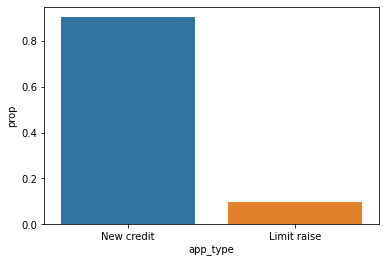

In [16]:
sns.barplot(x='app_type', y='prop', data=cases_per_app_type);

As we can see, over 90% of the applications submitted are of type New Credit. Less than 10% are of type Limit Raise.

#### - What is the distribution of Cases per Loan Goal?

In [17]:
cases_per_loan_goal = applications_data.case_loan_goal.value_counts() \
                        .to_frame() \
                        .reset_index() \
                        .rename(index=str, columns={
                            'index':'loan_goal',
                            'case_loan_goal':'count'})

cases_per_loan_goal['prop'] = cases_per_loan_goal['count']/sum(cases_per_app_type['count'])
cases_per_loan_goal

,loan_goal,count,prop
0,Car,339798,0.282631
1,Home improvement,294389,0.244862
2,Existing loan takeover,227606,0.189314
3,"Other, see explanation",110643,0.092029
4,Unknown,85085,0.070770
5,Remaining debt home,43874,0.036493
6,Not speficied,41048,0.034142
7,Extra spending limit,22964,0.019101
8,Caravan / Camper,12967,0.010785
9,Motorcycle,9983,0.008303


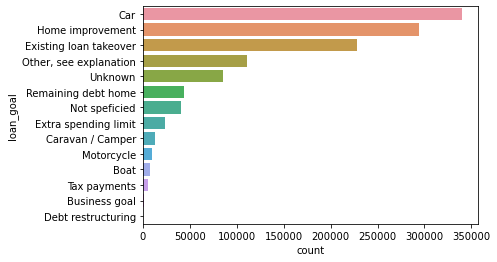

In [18]:
sns.barplot(x='count', y='loan_goal', data=cases_per_loan_goal);

As we can see in the above plot, the vast majority of loans applied for are for paying for a car, a home improvement or an existing loan. They make up over 70% of total applications.

#### - What is the distribution of number of activities per case?

In [19]:
activities_per_case = applications_data.groupby('case_concept_name').action.count().reset_index(name='num_actions')
activities_per_case

,case_concept_name,num_actions
0,Application_1000086665,22
1,Application_1000158214,25
2,Application_1000311556,18
3,Application_1000334415,40
4,Application_1000339879,51
...,...,...
31504,Application_999507989,37
31505,Application_999544538,102
31506,Application_999632431,23
31507,Application_999993467,37


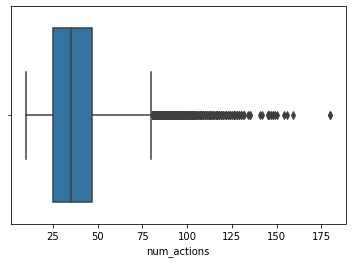

In [20]:
sns.boxplot(x=activities_per_case['num_actions']);

In [21]:
activities_per_case.describe()

,num_actions
count,31509.000000
mean,38.156305
std,16.715308
min,10.000000
25%,25.000000
50%,35.000000
75%,47.000000
max,180.000000


Here we see that in average, the number of activities registered in event log per application is around 35, with 75% of the cases having approximately 50 activities. Further investigation could discover which activities are more frequent in the context of an application.

#### - What is the distribution of value requested per application?

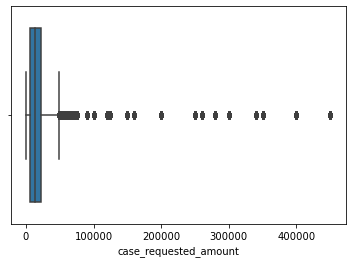

In [22]:
sns.boxplot(x=applications_data['case_requested_amount']);

In [23]:
applications_data['case_requested_amount'].describe().reset_index()

,index,case_requested_amount
0,count,1.202267e+06
1,mean,1.675947e+04
2,std,1.572320e+04
3,min,0.000000e+00
4,25%,6.000000e+03
5,50%,1.400000e+04
6,75%,2.300000e+04
7,max,4.500000e+05


Here we see that in average, the applications requested amount floats around 14,000-16,000 euros. Another interesting further investigation would be to look at the distribution of requested amount per type of loan. 

### - How many offers per application?

In [24]:
offers_per_application = applications_data[applications_data['concept_name'] == 'O_Create Offer'] \
                           .groupby('case_concept_name').event_id.nunique().reset_index()

In [25]:
offers_per_application

,case_concept_name,event_id
0,Application_1000086665,1
1,Application_1000158214,1
2,Application_1000311556,1
3,Application_1000334415,1
4,Application_1000339879,1
...,...,...
31504,Application_999507989,1
31505,Application_999544538,5
31506,Application_999632431,1
31507,Application_999993467,2


In [26]:
offers_per_application.describe()

,event_id
count,31509.000000
mean,1.364531
std,0.714896
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,10.000000


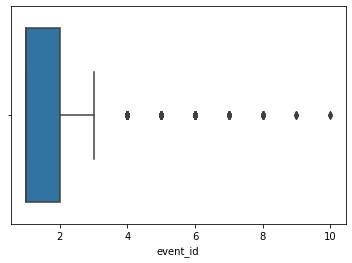

In [27]:
sns.boxplot(x=offers_per_application['event_id']);

As depicted above, we see that most applications receive usually one and sometimes two offers. Maybe one could check if there is any pattern in cases which receive more than one offer (25% of the cases).

### - What is the difference between the requested and the offered value?

In [28]:
value_diff_per_offer = applications_data[applications_data['concept_name'] == 'O_Create Offer'] \
                           .where(applications_data.case_requested_amount > 0) \
                           .assign(value_diff = lambda x: x.case_requested_amount - x.offered_amount) \
                           .assign(value_diff_prop = lambda x: (x.case_requested_amount - x.offered_amount)/x.case_requested_amount)

In [29]:
value_diff_per_offer

,action,org_resource,concept_name,event_origin,event_id,lifecycle_transition,time_timestamp,case_loan_goal,case_application_type,case_concept_name,...,first_withdrawal_amount,number_of_terms,accepted,monthly_cost,selected,credit_score,offered_amount,offer_id,value_diff,value_diff_prop
9,Created,User_52,O_Create Offer,Offer,Offer_148581083,complete,2016-01-02 11:29:03.994000+00:00,Existing loan takeover,New credit,Application_652823628,...,20000.0,44.0,True,498.29,True,979.0,20000.0,NaN,0.0,0.00
50,Created,User_38,O_Create Offer,Offer,Offer_1669071500,complete,2016-01-02 11:02:38.994000+00:00,Home improvement,New credit,Application_1691306052,...,500.0,33.0,False,200.00,False,0.0,6000.0,NaN,4000.0,0.40
79,Created,User_19,O_Create Offer,Offer,Offer_1209840642,complete,2016-01-02 11:05:15.942000+00:00,Home improvement,New credit,Application_428409768,...,15000.0,120.0,True,158.98,False,0.0,15000.0,NaN,0.0,0.00
87,Created,User_19,O_Create Offer,Offer,Offer_997411923,complete,2016-01-02 11:25:44.202000+00:00,Home improvement,New credit,Application_428409768,...,15000.0,120.0,True,158.98,True,1059.0,15000.0,NaN,0.0,0.00
135,Created,User_19,O_Create Offer,Offer,Offer_1319158006,complete,2016-01-04 17:19:15.892000+00:00,Car,New credit,Application_1746793196,...,3726.0,96.0,False,198.65,False,0.0,15700.0,NaN,-10700.0,-2.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202122,Created,User_84,O_Create Offer,Offer,Offer_682062790,complete,2017-01-02 13:33:03.922000+00:00,Existing loan takeover,New credit,Application_2103458006,...,2000.0,120.0,True,154.11,False,0.0,15000.0,NaN,0.0,0.00
1202124,Created,User_84,O_Create Offer,Offer,Offer_1395096354,complete,2017-01-02 13:34:11.626000+00:00,Existing loan takeover,New credit,Application_2103458006,...,0.0,127.0,True,150.00,False,0.0,15000.0,NaN,0.0,0.00
1202148,Created,User_84,O_Create Offer,Offer,Offer_1445809476,complete,2017-01-02 19:07:57.476000+00:00,Home improvement,New credit,Application_59622033,...,10000.0,120.0,True,106.46,True,854.0,10000.0,NaN,0.0,0.00
1202202,Created,User_84,O_Create Offer,Offer,Offer_1734870628,complete,2017-01-04 19:30:29.845000+00:00,Car,New credit,Application_303923658,...,0.0,77.0,True,450.00,True,996.0,30000.0,NaN,0.0,0.00


In [30]:
applications_data['case_requested_amount'].describe()

count    1.202267e+06
mean     1.675947e+04
std      1.572320e+04
min      0.000000e+00
25%      6.000000e+03
50%      1.400000e+04
75%      2.300000e+04
max      4.500000e+05
Name: case_requested_amount, dtype: float64

In [31]:
value_diff_per_offer[['value_diff','value_diff_prop']].describe()

,value_diff,value_diff_prop
count,38871.000000,38871.000000
mean,153.114231,-0.048973
std,7725.813208,0.504987
min,-70000.000000,-14.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,405000.000000,0.913846


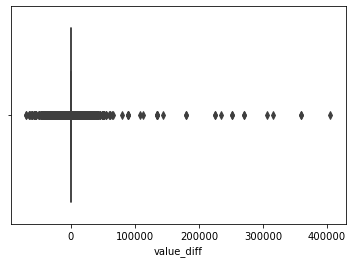

In [32]:
sns.boxplot(value_diff_per_offer.value_diff);

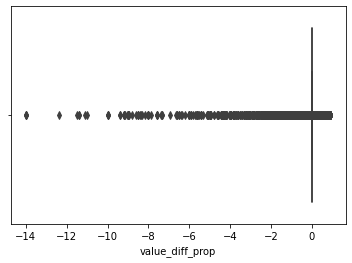

In [33]:
sns.boxplot(value_diff_per_offer.value_diff_prop);

### - What is the relation between percentage of requested value offered and acceptance by the customer?

In [34]:
applications_final_status = applications_data.groupby('case_concept_name') \
                               .agg(deal_closed = ('concept_name', lambda x: True if x.isin(['A_Pending']).any() else False)) \
                                .reset_index()
applications_final_status

,case_concept_name,deal_closed
0,Application_1000086665,False
1,Application_1000158214,True
2,Application_1000311556,False
3,Application_1000334415,False
4,Application_1000339879,True
...,...,...
31504,Application_999507989,True
31505,Application_999544538,True
31506,Application_999632431,False
31507,Application_999993467,True


In [35]:
value_diff_per_final_status = pd.merge(value_diff_per_offer.filter(['case_concept_name','value_diff','value_diff_prop']), applications_final_status, 
         on=['case_concept_name'], how='inner')
value_diff_per_final_status

,case_concept_name,value_diff,value_diff_prop,deal_closed
0,Application_652823628,0.0,0.00,True
1,Application_1691306052,4000.0,0.40,False
2,Application_428409768,0.0,0.00,True
3,Application_428409768,0.0,0.00,True
4,Application_1746793196,-10700.0,-2.14,True
...,...,...,...,...
38866,Application_2103458006,0.0,0.00,False
38867,Application_2103458006,0.0,0.00,False
38868,Application_59622033,0.0,0.00,True
38869,Application_303923658,0.0,0.00,True


In [36]:
value_diff_per_final_status[value_diff_per_final_status['deal_closed']].describe()

,value_diff,value_diff_prop
count,21442.000000,21442.000000
mean,93.085965,-0.047398
std,8214.027640,0.432354
min,-65000.000000,-11.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,405000.000000,0.901000


In [37]:
value_diff_per_final_status[~value_diff_per_final_status['deal_closed']].describe()

,value_diff,value_diff_prop
count,17429.000000,17429.000000
mean,226.963911,-0.050911
std,7078.683265,0.582047
min,-70000.000000,-14.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,360000.000000,0.913846


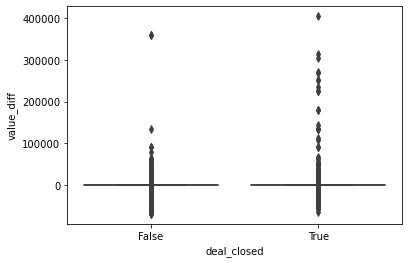

In [38]:
sns.boxplot(x='deal_closed', y='value_diff', data=value_diff_per_final_status)

As depicted by the above boxplots and quantiles, there seems to be no significant difference between the distributions of value difference in the applications whose deal was closed versus the applications whose deal was not closed.

### - How long between filling an application and getting an offer?

In [39]:
applications_data.where(applications_data.concept_name.str.startswith('O', na=False))

,action,org_resource,concept_name,event_origin,event_id,lifecycle_transition,time_timestamp,case_loan_goal,case_application_type,case_concept_name,case_requested_amount,first_withdrawal_amount,number_of_terms,accepted,monthly_cost,selected,credit_score,offered_amount,offer_id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1202263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1202264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1202265,statechange,User_28,O_Cancelled,Offer,OfferState_420066181,complete,2017-01-16 09:51:21.139000+00:00,Home improvement,New credit,Application_1350494635,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_1580299144


In [40]:
apps_creation_date = applications_data.where(applications_data.concept_name == 'A_Create Application') \
                        .groupby('case_concept_name') \
                        .agg(app_creation_date = ('time_timestamp', 'first')) \
                        .reset_index() \
                        .rename(index=str, columns={'case_concept_name':'app_id'})

apps_creation_date

,app_id,app_creation_date
0,Application_1000086665,2016-08-03 15:57:21.673000+00:00
1,Application_1000158214,2016-06-02 10:14:26.844000+00:00
2,Application_1000311556,2016-04-04 15:56:37.675000+00:00
3,Application_1000334415,2016-09-15 16:39:17.758000+00:00
4,Application_1000339879,2016-03-17 12:57:10.159000+00:00
...,...,...
31504,Application_999507989,2016-03-17 06:53:36.792000+00:00
31505,Application_999544538,2016-05-07 11:46:42.914000+00:00
31506,Application_999632431,2016-12-15 12:24:56.147000+00:00
31507,Application_999993467,2016-07-05 16:21:02.368000+00:00


In [41]:
offers_creation_date = applications_data.where(applications_data.concept_name == 'O_Create Offer') \
                        .groupby(['case_concept_name','event_id']) \
                        .agg(offer_creation_date = ('time_timestamp', 'first')) \
                        .reset_index() \
                        .rename(index=str, columns={'event_id':'offer_id',
                                                    'case_concept_name':'app_id'})

offers_creation_date

,app_id,offer_id,offer_creation_date
0,Application_1000086665,Offer_410892064,2016-08-05 13:59:57.320000+00:00
1,Application_1000158214,Offer_927137349,2016-06-06 08:12:02.402000+00:00
2,Application_1000311556,Offer_2032690166,2016-04-04 16:12:03.476000+00:00
3,Application_1000334415,Offer_2062524462,2016-09-16 11:35:15.403000+00:00
4,Application_1000339879,Offer_542912001,2016-03-18 08:30:18.800000+00:00
...,...,...,...
42990,Application_999544538,Offer_984993544,2016-06-24 15:54:03.372000+00:00
42991,Application_999632431,Offer_872978767,2016-12-16 10:17:22.809000+00:00
42992,Application_999993467,Offer_148382244,2016-07-07 15:32:11.395000+00:00
42993,Application_999993467,Offer_1512420329,2016-07-07 13:09:22.265000+00:00


In [42]:
offers_sending_date = applications_data[applications_data.concept_name.str.startswith('O_Sent')] \
                        .groupby(['case_concept_name','offer_id']) \
                        .agg(offer_sending_date = ('time_timestamp', 'first')) \
                        .reset_index() \
                        .rename(index=str, columns={'event_id':'offer_id',
                                                    'case_concept_name':'app_id'})

offers_sending_date

,app_id,offer_id,offer_sending_date
0,Application_1000086665,Offer_410892064,2016-08-05 14:01:23.264000+00:00
1,Application_1000158214,Offer_927137349,2016-06-06 08:16:46.835000+00:00
2,Application_1000311556,Offer_2032690166,2016-04-04 16:15:45.527000+00:00
3,Application_1000334415,Offer_2062524462,2016-09-16 11:36:11.620000+00:00
4,Application_1000339879,Offer_542912001,2016-03-18 08:31:53.169000+00:00
...,...,...,...
41728,Application_999544538,Offer_984993544,2016-06-24 15:54:20.457000+00:00
41729,Application_999632431,Offer_872978767,2016-12-16 10:18:11.311000+00:00
41730,Application_999993467,Offer_148382244,2016-07-07 15:32:24.853000+00:00
41731,Application_999993467,Offer_1512420329,2016-07-07 13:09:38.730000+00:00


In [43]:
offers_end_date = applications_data.where(applications_data.concept_name.isin(['O_Cancelled','O_Accepted', 'O_Refused'])) \
                        .groupby(['case_concept_name','offer_id']) \
                        .agg(offer_end_date = ('time_timestamp', 'last')) \
                        .reset_index() \
                        .rename(index=str, columns={'case_concept_name':'app_id'})

offers_end_date

,app_id,offer_id,offer_end_date
0,Application_1000086665,Offer_410892064,2016-09-05 06:00:36.829000+00:00
1,Application_1000158214,Offer_927137349,2016-06-10 11:02:01.275000+00:00
2,Application_1000311556,Offer_2032690166,2016-05-05 06:00:48.950000+00:00
3,Application_1000334415,Offer_2062524462,2016-09-29 07:45:34.380000+00:00
4,Application_1000339879,Offer_542912001,2016-03-30 09:11:48.591000+00:00
...,...,...,...
42816,Application_999544538,Offer_984993544,2016-07-26 06:35:18.194000+00:00
42817,Application_999632431,Offer_872978767,2017-01-16 07:00:30.449000+00:00
42818,Application_999993467,Offer_148382244,2016-07-19 11:03:45.111000+00:00
42819,Application_999993467,Offer_1512420329,2016-07-19 11:03:45.140000+00:00


In [44]:
apps_offers_date = pd.merge(apps_creation_date,pd.merge(offers_creation_date,pd.merge(offers_end_date,offers_sending_date))) \
                    .sort_values(['app_id','offer_creation_date']) \
                    .assign(app_offer_timediff = lambda x: (pd.to_datetime(x.offer_sending_date) - 
                            pd.to_datetime(x.app_creation_date)) / pd.Timedelta(days=1))
apps_offers_date

,app_id,app_creation_date,offer_id,offer_creation_date,offer_end_date,offer_sending_date,app_offer_timediff
0,Application_1000086665,2016-08-03 15:57:21.673000+00:00,Offer_410892064,2016-08-05 13:59:57.320000+00:00,2016-09-05 06:00:36.829000+00:00,2016-08-05 14:01:23.264000+00:00,1.919463
1,Application_1000158214,2016-06-02 10:14:26.844000+00:00,Offer_927137349,2016-06-06 08:12:02.402000+00:00,2016-06-10 11:02:01.275000+00:00,2016-06-06 08:16:46.835000+00:00,3.918287
2,Application_1000311556,2016-04-04 15:56:37.675000+00:00,Offer_2032690166,2016-04-04 16:12:03.476000+00:00,2016-05-05 06:00:48.950000+00:00,2016-04-04 16:15:45.527000+00:00,0.013285
3,Application_1000334415,2016-09-15 16:39:17.758000+00:00,Offer_2062524462,2016-09-16 11:35:15.403000+00:00,2016-09-29 07:45:34.380000+00:00,2016-09-16 11:36:11.620000+00:00,0.789512
4,Application_1000339879,2016-03-17 12:57:10.159000+00:00,Offer_542912001,2016-03-18 08:30:18.800000+00:00,2016-03-30 09:11:48.591000+00:00,2016-03-18 08:31:53.169000+00:00,0.815776
...,...,...,...,...,...,...,...
41553,Application_999544538,2016-05-07 11:46:42.914000+00:00,Offer_610539704,2016-06-27 08:42:41.810000+00:00,2016-07-26 06:35:18.176000+00:00,2016-06-27 08:43:03.641000+00:00,50.872462
41555,Application_999632431,2016-12-15 12:24:56.147000+00:00,Offer_872978767,2016-12-16 10:17:22.809000+00:00,2017-01-16 07:00:30.449000+00:00,2016-12-16 10:18:11.311000+00:00,0.911981
41557,Application_999993467,2016-07-05 16:21:02.368000+00:00,Offer_1512420329,2016-07-07 13:09:22.265000+00:00,2016-07-19 11:03:45.140000+00:00,2016-07-07 13:09:38.730000+00:00,1.867088
41556,Application_999993467,2016-07-05 16:21:02.368000+00:00,Offer_148382244,2016-07-07 15:32:11.395000+00:00,2016-07-19 11:03:45.111000+00:00,2016-07-07 15:32:24.853000+00:00,1.966232


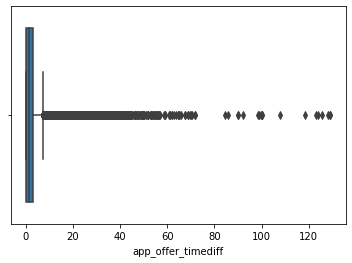

In [45]:
sns.boxplot(x='app_offer_timediff', data = apps_offers_date);

In [46]:
apps_offers_date['app_offer_timediff'].describe()

count    41559.000000
mean         3.411913
std          6.793977
min          0.000587
25%          0.065588
50%          1.113875
75%          2.945479
max        129.193251
Name: app_offer_timediff, dtype: float64

We see here that the average waiting time between application creation and offer sending is usually short, being around 1 to 3 days. Due to such low variability, I thinl this feature might not have a great influence in the offer acceptance by the client.

# Modeling

## Regression

#### Import Regression Libs

In [47]:
# Scikit-Learn Model libraries (question II)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### R-1.0 - Simple Regression
- Goal: Predict offered loan amount
- Time: After application has been created
- Input:
    + Requested Amount
    + Credit Score
    + Time of year
    + Loan Type
    + Application Type

#### Build model base dataset 

In [48]:
applications_data.head()

,action,org_resource,concept_name,event_origin,event_id,lifecycle_transition,time_timestamp,case_loan_goal,case_application_type,case_concept_name,case_requested_amount,first_withdrawal_amount,number_of_terms,accepted,monthly_cost,selected,credit_score,offered_amount,offer_id
0,Created,User_1,A_Create Application,Application,Application_652823628,complete,2016-01-01 09:51:15.304000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,statechange,User_1,A_Submitted,Application,ApplState_1582051990,complete,2016-01-01 09:51:15.352000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Created,User_1,W_Handle leads,Workflow,Workitem_1298499574,schedule,2016-01-01 09:51:15.774000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Deleted,User_1,W_Handle leads,Workflow,Workitem_1673366067,withdraw,2016-01-01 09:52:36.392000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Created,User_1,W_Complete application,Workflow,Workitem_1493664571,schedule,2016-01-01 09:52:36.403000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
applications_data[applications_data['case_concept_name'] == 'Application_1000086665']

,action,org_resource,concept_name,event_origin,event_id,lifecycle_transition,time_timestamp,case_loan_goal,case_application_type,case_concept_name,case_requested_amount,first_withdrawal_amount,number_of_terms,accepted,monthly_cost,selected,credit_score,offered_amount,offer_id
686058,Created,User_1,A_Create Application,Application,Application_1000086665,complete,2016-08-03 15:57:21.673000+00:00,"Other, see explanation",New credit,Application_1000086665,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
686059,statechange,User_1,A_Submitted,Application,ApplState_161925113,complete,2016-08-03 15:57:21.734000+00:00,"Other, see explanation",New credit,Application_1000086665,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
686060,Created,User_1,W_Handle leads,Workflow,Workitem_747707399,schedule,2016-08-03 15:57:21.963000+00:00,"Other, see explanation",New credit,Application_1000086665,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
686061,Deleted,User_1,W_Handle leads,Workflow,Workitem_1030261128,withdraw,2016-08-03 15:58:28.286000+00:00,"Other, see explanation",New credit,Application_1000086665,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
686062,Created,User_1,W_Complete application,Workflow,Workitem_1127124826,schedule,2016-08-03 15:58:28.293000+00:00,"Other, see explanation",New credit,Application_1000086665,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
686063,statechange,User_1,A_Concept,Application,ApplState_385184570,complete,2016-08-03 15:58:28.299000+00:00,"Other, see explanation",New credit,Application_1000086665,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
686064,Obtained,User_14,W_Complete application,Workflow,Workitem_518019192,start,2016-08-04 13:39:29.557000+00:00,"Other, see explanation",New credit,Application_1000086665,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
686065,Released,User_14,W_Complete application,Workflow,Workitem_1967765821,suspend,2016-08-04 13:50:12.281000+00:00,"Other, see explanation",New credit,Application_1000086665,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
686066,statechange,User_5,A_Accepted,Application,ApplState_856156982,complete,2016-08-05 13:57:07.419000+00:00,"Other, see explanation",New credit,Application_1000086665,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
686067,Created,User_5,O_Create Offer,Offer,Offer_410892064,complete,2016-08-05 13:59:57.320000+00:00,"Other, see explanation",New credit,Application_1000086665,5000.0,5000.0,22.0,True,241.28,False,0.0,5000.0,NaN


In [50]:
r01_base_df = applications_data.groupby(['case_concept_name', 'offered_amount']) \
                .agg(requested_amount = ('case_requested_amount', 'first'),
                     credit_score = ('credit_score', 'mean')) \
                .reset_index() \
                .rename(index=str, columns={'case_concept_name':'app_id'})

In [51]:
r01_base_df

,app_id,offered_amount,requested_amount,credit_score
0,Application_1000086665,5000.0,5000.0,0.0
1,Application_1000158214,12500.0,12500.0,929.0
2,Application_1000311556,45000.0,45000.0,0.0
3,Application_1000334415,5000.0,5000.0,0.0
4,Application_1000339879,37500.0,37500.0,798.0
...,...,...,...,...
35463,Application_999544538,50000.0,50000.0,159.0
35464,Application_999632431,12000.0,12000.0,0.0
35465,Application_999993467,10000.0,10000.0,0.0
35466,Application_999993467,15000.0,10000.0,854.0


In [52]:
apps_creation_date

,app_id,app_creation_date
0,Application_1000086665,2016-08-03 15:57:21.673000+00:00
1,Application_1000158214,2016-06-02 10:14:26.844000+00:00
2,Application_1000311556,2016-04-04 15:56:37.675000+00:00
3,Application_1000334415,2016-09-15 16:39:17.758000+00:00
4,Application_1000339879,2016-03-17 12:57:10.159000+00:00
...,...,...
31504,Application_999507989,2016-03-17 06:53:36.792000+00:00
31505,Application_999544538,2016-05-07 11:46:42.914000+00:00
31506,Application_999632431,2016-12-15 12:24:56.147000+00:00
31507,Application_999993467,2016-07-05 16:21:02.368000+00:00


In [53]:
app_time_of_year = apps_creation_date.assign(app_creation_month = lambda x: pd.to_datetime(x.app_creation_date).dt.month) \
                    .assign(app_creation_quarter = lambda x: np.ceil(x.app_creation_month/3).astype(int),
                            app_creation_semester = lambda x: np.ceil(x.app_creation_month/6).astype(int))
app_time_of_year

,app_id,app_creation_date,app_creation_month,app_creation_quarter,app_creation_semester
0,Application_1000086665,2016-08-03 15:57:21.673000+00:00,8,3,2
1,Application_1000158214,2016-06-02 10:14:26.844000+00:00,6,2,1
2,Application_1000311556,2016-04-04 15:56:37.675000+00:00,4,2,1
3,Application_1000334415,2016-09-15 16:39:17.758000+00:00,9,3,2
4,Application_1000339879,2016-03-17 12:57:10.159000+00:00,3,1,1
...,...,...,...,...,...
31504,Application_999507989,2016-03-17 06:53:36.792000+00:00,3,1,1
31505,Application_999544538,2016-05-07 11:46:42.914000+00:00,5,2,1
31506,Application_999632431,2016-12-15 12:24:56.147000+00:00,12,4,2
31507,Application_999993467,2016-07-05 16:21:02.368000+00:00,7,3,2


In [57]:
applications_data.head()

,action,org_resource,concept_name,event_origin,event_id,lifecycle_transition,time_timestamp,case_loan_goal,case_application_type,case_concept_name,case_requested_amount,first_withdrawal_amount,number_of_terms,accepted,monthly_cost,selected,credit_score,offered_amount,offer_id
0,Created,User_1,A_Create Application,Application,Application_652823628,complete,2016-01-01 09:51:15.304000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,statechange,User_1,A_Submitted,Application,ApplState_1582051990,complete,2016-01-01 09:51:15.352000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Created,User_1,W_Handle leads,Workflow,Workitem_1298499574,schedule,2016-01-01 09:51:15.774000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Deleted,User_1,W_Handle leads,Workflow,Workitem_1673366067,withdraw,2016-01-01 09:52:36.392000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Created,User_1,W_Complete application,Workflow,Workitem_1493664571,schedule,2016-01-01 09:52:36.403000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
cat_vars_df = applications_data.groupby('case_concept_name').agg(loan_type = ('case_loan_goal','first'),
                                                                 app_type = ('case_application_type','first'))
cat_vars_df = pd.get_dummies(data = cat_vars_df, prefix = 'loan_type', prefix_sep = ':', columns = ['loan_type'], drop_first = False, dummy_na = True)
cat_vars_df = pd.get_dummies(data = cat_vars_df, prefix = 'app_type', prefix_sep = ':', columns = ['app_type'], drop_first = False, dummy_na = True) \
                .reset_index() \
                .rename(index=str, columns={'case_concept_name':'app_id'})

cat_vars_df.columns = cat_vars_df.columns.str.lower().str.replace(' ','_').str.replace('_/_','_')

cat_vars_df

,app_id,loan_type:boat,loan_type:business_goal,loan_type:car,loan_type:caravan_camper,loan_type:debt_restructuring,loan_type:existing_loan_takeover,loan_type:extra_spending_limit,loan_type:home_improvement,loan_type:motorcycle,loan_type:not_speficied,"loan_type:other,_see_explanation",loan_type:remaining_debt_home,loan_type:tax_payments,loan_type:unknown,loan_type:nan,app_type:limit_raise,app_type:new_credit,app_type:nan
0,Application_1000086665,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,Application_1000158214,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,Application_1000311556,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,Application_1000334415,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,Application_1000339879,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31504,Application_999507989,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
31505,Application_999544538,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
31506,Application_999632431,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
31507,Application_999993467,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [69]:
r01_df = pd.merge(r01_base_df, pd.merge(app_time_of_year,cat_vars_df)) \
            .drop('app_creation_date', axis=1)

r01_df

,app_id,offered_amount,requested_amount,credit_score,app_creation_month,app_creation_quarter,app_creation_semester,loan_type:boat,loan_type:business_goal,loan_type:car,...,loan_type:motorcycle,loan_type:not_speficied,"loan_type:other,_see_explanation",loan_type:remaining_debt_home,loan_type:tax_payments,loan_type:unknown,loan_type:nan,app_type:limit_raise,app_type:new_credit,app_type:nan
0,Application_1000086665,5000.0,5000.0,0.0,8,3,2,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,Application_1000158214,12500.0,12500.0,929.0,6,2,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Application_1000311556,45000.0,45000.0,0.0,4,2,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,Application_1000334415,5000.0,5000.0,0.0,9,3,2,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,Application_1000339879,37500.0,37500.0,798.0,3,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35463,Application_999544538,50000.0,50000.0,159.0,5,2,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
35464,Application_999632431,12000.0,12000.0,0.0,12,4,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35465,Application_999993467,10000.0,10000.0,0.0,7,3,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
35466,Application_999993467,15000.0,10000.0,854.0,7,3,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Split into Train/Test

In [70]:
x_train, x_test, y_train, y_test = train_test_split(r01_df.drop(['app_id','offered_amount'], axis=1), r01_df['offered_amount'], test_size=0.2, random_state=199)

In [71]:
x_train.head()

,requested_amount,credit_score,app_creation_month,app_creation_quarter,app_creation_semester,loan_type:boat,loan_type:business_goal,loan_type:car,loan_type:caravan_camper,loan_type:debt_restructuring,...,loan_type:motorcycle,loan_type:not_speficied,"loan_type:other,_see_explanation",loan_type:remaining_debt_home,loan_type:tax_payments,loan_type:unknown,loan_type:nan,app_type:limit_raise,app_type:new_credit,app_type:nan
19812,0.0,983.0,5,2,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
23256,10000.0,748.0,9,3,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3254,20000.0,0.0,7,3,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
24086,20000.0,0.0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29832,0.0,0.0,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Train Model

In [187]:
## Print sklearn scorers keys
#import sklearn
#sklearn.metrics.SCORERS.keys()

In [72]:
scaler = StandardScaler()
model = LinearRegression()

pipeline = make_pipeline(scaler, model)

kf = KFold(n_splits=10, shuffle=True, random_state=199)
cv_results = cross_val_score(pipeline, # Pipeline
                             x_train, # Feature matrix
                             y_train, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="neg_root_mean_squared_error", # Loss function
                             n_jobs=-1) # Use all CPU scores

In [73]:
cv_results

array([ -7961.20517381, -10585.50042496, -10429.58503096,  -9117.07126516,
        -8811.1524188 ,  -7838.90237589,  -8293.84263021,  -9346.98568957,
        -7447.99269567,  -9150.09783694])

In [74]:
cv_results.mean()

-8898.233554197624

In [75]:
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)
model.fit(x_train_std, y_train)

LinearRegression()

#### Evaluate Model

In [76]:
y_pred = model.predict(x_test_std)

In [77]:
train_score = model.score(x_train_std, y_train)
print(train_score)

0.5785278716871944


In [78]:
test_score = model.score(x_test_std, y_test)
print(test_score)

0.6589743394267681


### R-2.0 - Regression with Model/Hyper-Parameter Selection
- Goal: Predict offered loan amount
- Time: After application has been created
- Input:
    + Requested Amount
    + Credit Score
    + Time of year
    + Loan Type
    + Application Type

#### Notice: uses the same data as R-1.0

#### Train Model

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [93]:
regression_models_pip = Pipeline([
    ('regressor', LinearRegression())
])

regression_models_param_grid = [
    {'regressor' : [LinearRegression()],
     'regressor__fit_intercept' : [True, False]},
    {'regressor' : [Ridge(random_state=199)],
     'regressor__estimator__alpha' : [1,0.1,0.01,0.001]},
    {'regressor' : [Lasso(random_state=199)],
     'regressor__estimator__alpha' : [1,0.1,0.01,0.001]},
    {'regressor' : [ElasticNet(random_state=199)],
     'regressor__estimator__alpha' : [1,0.1,0.01,0.001]},
    {'regressor' : [SGDRegressor(random_state=199)],
     'regressor__estimator__penalty' : ['l2', 'l1', 'elasticnet'],
     'regressor__estimator__' : [1,0.1,0.01,0.001]},
    {'regressor' : [RandomForestRegressor(random_state=199)],
    'regressor__estimator__n_estimators' : [10,50,250],
    'regressor__estimator__max_depth' : [10, 50, 100],
    'regressor__estimator__min_samples_split' : [1, 5, 10]}
]

regression_gs = GridSearchCV(estimator=regression_models_pip,
            param_grid=regression_models_param_grid,
            scoring='f1',
            cv=3,
            n_jobs=-1,
            verbose=True)  

In [95]:
# print('Performing Grid Search...')
# # Fit grid search
# regression_gs.fit(x_train, y_train)
# # Best params
# print('Best params: %s' % regression_gs.best_params_)
# # Best training data accuracy
# print('Best training score: %.3f' % regression_gs.best_score_)
# # Predict on test data with best params
# test_score = regression_gs.score(X_test, y_test)
# # Test data accuracy of model with best params
# print('Test set score for best params: %.3f ' % test_score)

In [92]:
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

## Classification

## Extra: Offers Data

In [18]:
offers = pd.read_csv('../data/BPI_Challenge_offer_log_2017.csv')

In [19]:
offers.head()

,Action,org:resource,concept:name,EventOrigin,EventID,lifecycle:transition,time:timestamp,case:concept:name,case:MonthlyCost,case:Selected,case:ApplicationID,case:FirstWithdrawalAmount,case:CreditScore,case:OfferedAmount,case:NumberOfTerms,case:Accepted,OfferID
0,Created,User_17,O_Create Offer,Offer,Offer_247135719,complete,2016-01-02 09:17:05.720000+00:00,Offer_247135719,201.76,False,Application_196483749,10000.0,0,10000.0,57,True,NaN
1,statechange,User_17,O_Created,Offer,OfferState_124849367,complete,2016-01-02 09:17:08.762000+00:00,Offer_247135719,201.76,False,Application_196483749,10000.0,0,10000.0,57,True,Offer_247135719
2,statechange,User_17,O_Sent (online only),Offer,OfferState_440662877,complete,2016-01-02 09:19:21.330000+00:00,Offer_247135719,201.76,False,Application_196483749,10000.0,0,10000.0,57,True,Offer_247135719
3,statechange,User_17,O_Cancelled,Offer,OfferState_591416028,complete,2016-01-02 09:21:26.034000+00:00,Offer_247135719,201.76,False,Application_196483749,10000.0,0,10000.0,57,True,Offer_247135719
4,Created,User_17,O_Create Offer,Offer,Offer_941964966,complete,2016-01-02 09:21:42.022000+00:00,Offer_941964966,201.76,False,Application_196483749,4100.0,0,10000.0,57,True,NaN


#### Fix column names 

In [20]:
offers.columns

Index(['Action', 'org:resource', 'concept:name', 'EventOrigin', 'EventID',
       'lifecycle:transition', 'time:timestamp', 'case:concept:name',
       'case:MonthlyCost', 'case:Selected', 'case:ApplicationID',
       'case:FirstWithdrawalAmount', 'case:CreditScore', 'case:OfferedAmount',
       'case:NumberOfTerms', 'case:Accepted', 'OfferID'],
      dtype='object')

In [21]:
fixed_offers_cols = [fix_cols_names(col) for col in offers.columns]
fixed_offers_cols

['action',
 'org_resource',
 'concept_name',
 'event_origin',
 'event_id',
 'lifecycle_transition',
 'time_timestamp',
 'case_concept_name',
 'case_monthly_cost',
 'case_selected',
 'case_application_id',
 'case_first_withdrawal_amount',
 'case_credit_score',
 'case_offered_amount',
 'case_number_of_terms',
 'case_accepted',
 'offer_id']

In [22]:
offers.columns = fixed_offers_cols

In [23]:
offers.head()

,action,org_resource,concept_name,event_origin,event_id,lifecycle_transition,time_timestamp,case_concept_name,case_monthly_cost,case_selected,case_application_id,case_first_withdrawal_amount,case_credit_score,case_offered_amount,case_number_of_terms,case_accepted,offer_id
0,Created,User_17,O_Create Offer,Offer,Offer_247135719,complete,2016-01-02 09:17:05.720000+00:00,Offer_247135719,201.76,False,Application_196483749,10000.0,0,10000.0,57,True,NaN
1,statechange,User_17,O_Created,Offer,OfferState_124849367,complete,2016-01-02 09:17:08.762000+00:00,Offer_247135719,201.76,False,Application_196483749,10000.0,0,10000.0,57,True,Offer_247135719
2,statechange,User_17,O_Sent (online only),Offer,OfferState_440662877,complete,2016-01-02 09:19:21.330000+00:00,Offer_247135719,201.76,False,Application_196483749,10000.0,0,10000.0,57,True,Offer_247135719
3,statechange,User_17,O_Cancelled,Offer,OfferState_591416028,complete,2016-01-02 09:21:26.034000+00:00,Offer_247135719,201.76,False,Application_196483749,10000.0,0,10000.0,57,True,Offer_247135719
4,Created,User_17,O_Create Offer,Offer,Offer_941964966,complete,2016-01-02 09:21:42.022000+00:00,Offer_941964966,201.76,False,Application_196483749,4100.0,0,10000.0,57,True,NaN


In [24]:
offers.describe()

,case_monthly_cost,case_first_withdrawal_amount,case_credit_score,case_offered_amount,case_number_of_terms
count,193849.000000,193849.000000,193849.000000,193849.000000,193849.000000
mean,281.028689,8383.631394,353.372496,18574.845074,83.356014
std,190.251145,10782.271378,443.086227,13718.516739,36.363493
min,43.050000,0.000000,0.000000,5000.000000,5.000000
25%,152.820000,0.000000,0.000000,9000.000000,56.000000
50%,244.530000,5000.000000,0.000000,15000.000000,78.000000
75%,350.000000,12000.000000,869.000000,25000.000000,120.000000
max,6673.830000,75000.000000,1145.000000,75000.000000,180.000000


In [25]:
offers.describe(include='object')

,action,org_resource,concept_name,event_origin,event_id,lifecycle_transition,time_timestamp,case_concept_name,case_application_id,offer_id
count,193849,193849,193849,193849,193849,193849,193849,193849,193849,150854
unique,2,144,8,1,193849,1,193847,42995,31509,42995
top,statechange,User_1,O_Created,Offer,OfferState_557678102,complete,2016-03-02 14:15:40.745000+00:00,Offer_1172149475,Application_423354116,Offer_1172149475
freq,150854,9982,42995,193849,1,193849,2,5,40,4


##### Check a few offers event logs 

In [33]:
offers.case_concept_name.sample(3)

76354    Offer_1606531149
14188     Offer_673109133
40003     Offer_883478334
Name: case_concept_name, dtype: object

In [34]:
offers[offers['case_concept_name'] == 'Offer_1606531149']

,action,org_resource,concept_name,event_origin,event_id,lifecycle_transition,time_timestamp,case_concept_name,case_monthly_cost,case_selected,case_application_id,case_first_withdrawal_amount,case_credit_score,case_offered_amount,case_number_of_terms,case_accepted,offer_id
76354,Created,User_48,O_Create Offer,Offer,Offer_1606531149,complete,2016-06-13 14:55:32.919000+00:00,Offer_1606531149,251.38,True,Application_2012114184,16500.0,860,16500.0,75,True,NaN
76355,statechange,User_48,O_Created,Offer,OfferState_1023716653,complete,2016-06-13 14:55:34.533000+00:00,Offer_1606531149,251.38,True,Application_2012114184,16500.0,860,16500.0,75,True,Offer_1606531149
76356,statechange,User_48,O_Sent (mail and online),Offer,OfferState_879810000,complete,2016-06-13 14:56:03.332000+00:00,Offer_1606531149,251.38,True,Application_2012114184,16500.0,860,16500.0,75,True,Offer_1606531149
76357,statechange,User_123,O_Returned,Offer,OfferState_1077866045,complete,2016-06-21 10:09:11.038000+00:00,Offer_1606531149,251.38,True,Application_2012114184,16500.0,860,16500.0,75,True,Offer_1606531149
76358,statechange,User_87,O_Accepted,Offer,OfferState_920048730,complete,2016-06-24 10:45:04.240000+00:00,Offer_1606531149,251.38,True,Application_2012114184,16500.0,860,16500.0,75,True,Offer_1606531149


In [35]:
offers[offers['case_concept_name'] == 'Offer_673109133']

,action,org_resource,concept_name,event_origin,event_id,lifecycle_transition,time_timestamp,case_concept_name,case_monthly_cost,case_selected,case_application_id,case_first_withdrawal_amount,case_credit_score,case_offered_amount,case_number_of_terms,case_accepted,offer_id
14187,Created,User_8,O_Create Offer,Offer,Offer_673109133,complete,2016-02-01 16:03:49.730000+00:00,Offer_673109133,191.27,True,Application_228788134,8340.0,853,10000.0,60,False,NaN
14188,statechange,User_8,O_Created,Offer,OfferState_1777039720,complete,2016-02-01 16:03:51.565000+00:00,Offer_673109133,191.27,True,Application_228788134,8340.0,853,10000.0,60,False,Offer_673109133
14189,statechange,User_8,O_Sent (mail and online),Offer,OfferState_125175260,complete,2016-02-01 16:04:04.868000+00:00,Offer_673109133,191.27,True,Application_228788134,8340.0,853,10000.0,60,False,Offer_673109133
14190,statechange,User_113,O_Returned,Offer,OfferState_913235417,complete,2016-02-11 09:13:08.602000+00:00,Offer_673109133,191.27,True,Application_228788134,8340.0,853,10000.0,60,False,Offer_673109133
14191,statechange,User_29,O_Accepted,Offer,OfferState_1130878564,complete,2016-03-14 11:06:07.133000+00:00,Offer_673109133,191.27,True,Application_228788134,8340.0,853,10000.0,60,False,Offer_673109133


In [36]:
offers[offers['case_concept_name'] == 'Offer_883478334']

,action,org_resource,concept_name,event_origin,event_id,lifecycle_transition,time_timestamp,case_concept_name,case_monthly_cost,case_selected,case_application_id,case_first_withdrawal_amount,case_credit_score,case_offered_amount,case_number_of_terms,case_accepted,offer_id
40002,Created,User_37,O_Create Offer,Offer,Offer_883478334,complete,2016-03-25 11:23:29.215000+00:00,Offer_883478334,118.15,True,Application_1987444327,5000.0,1099,5000.0,48,True,NaN
40003,statechange,User_37,O_Created,Offer,OfferState_1290073688,complete,2016-03-25 11:23:30.698000+00:00,Offer_883478334,118.15,True,Application_1987444327,5000.0,1099,5000.0,48,True,Offer_883478334
40004,statechange,User_37,O_Sent (mail and online),Offer,OfferState_1004617078,complete,2016-03-25 11:24:39.598000+00:00,Offer_883478334,118.15,True,Application_1987444327,5000.0,1099,5000.0,48,True,Offer_883478334
40005,statechange,User_119,O_Returned,Offer,OfferState_502826809,complete,2016-04-08 10:52:50.294000+00:00,Offer_883478334,118.15,True,Application_1987444327,5000.0,1099,5000.0,48,True,Offer_883478334
40006,statechange,User_112,O_Accepted,Offer,OfferState_1522553213,complete,2016-04-11 12:48:42.719000+00:00,Offer_883478334,118.15,True,Application_1987444327,5000.0,1099,5000.0,48,True,Offer_883478334


In [37]:
offers.concept_name.value_counts()

O_Created                   42995
O_Create Offer              42995
O_Sent (mail and online)    39707
O_Returned                  23305
O_Cancelled                 20898
O_Accepted                  17228
O_Refused                    4695
O_Sent (online only)         2026
Name: concept_name, dtype: int64

In [38]:
offers[offers['concept_name'] == 'O_Refused']

,action,org_resource,concept_name,event_origin,event_id,lifecycle_transition,time_timestamp,case_concept_name,case_monthly_cost,case_selected,case_application_id,case_first_withdrawal_amount,case_credit_score,case_offered_amount,case_number_of_terms,case_accepted,offer_id
29,statechange,User_68,O_Refused,Offer,OfferState_1494429296,complete,2016-01-07 13:29:49.710000+00:00,Offer_1669071500,200.00,False,Application_1691306052,500.0,0,6000.0,33,False,Offer_1669071500
78,statechange,User_99,O_Refused,Offer,OfferState_722957562,complete,2016-01-11 09:30:52.996000+00:00,Offer_117620760,211.90,True,Application_1878239836,328.0,0,15000.0,84,True,Offer_117620760
160,statechange,User_90,O_Refused,Offer,OfferState_295786467,complete,2016-01-11 09:39:35.166000+00:00,Offer_603196958,284.00,True,Application_546206358,6000.0,0,14200.0,57,True,Offer_603196958
174,statechange,User_95,O_Refused,Offer,OfferState_130777715,complete,2016-01-11 13:19:39.082000+00:00,Offer_1690361215,50.00,True,Application_1806387393,0.0,0,5000.0,138,False,Offer_1690361215
184,statechange,User_75,O_Refused,Offer,OfferState_230520219,complete,2016-01-26 12:12:52.803000+00:00,Offer_2134161297,250.00,True,Application_914660918,4000.0,0,25000.0,126,False,Offer_2134161297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193590,statechange,User_87,O_Refused,Offer,OfferState_124281594,complete,2017-01-25 10:52:03.401000+00:00,Offer_1611364019,389.73,True,Application_1183810144,1887.0,0,21000.0,60,False,Offer_1611364019
193629,statechange,User_106,O_Refused,Offer,OfferState_2024893918,complete,2017-01-30 14:40:44.434000+00:00,Offer_2113409792,225.99,False,Application_601219508,14000.0,0,14000.0,72,False,Offer_2113409792
193634,statechange,User_29,O_Refused,Offer,OfferState_1729665180,complete,2017-01-23 11:11:05.369000+00:00,Offer_1453141611,248.89,True,Application_1954175744,20000.0,0,20000.0,95,True,Offer_1453141611
193686,statechange,User_75,O_Refused,Offer,OfferState_519490726,complete,2017-01-23 12:56:43.362000+00:00,Offer_273685427,226.03,True,Application_1273378053,3251.0,0,22000.0,120,False,Offer_273685427
